<a href="https://colab.research.google.com/github/hrdev11/University-Project/blob/main/FoodDeliveryTimePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping

# Reading and Exploring Data

In [ ]:
#Storing in a Data Frame
df = pd.read_csv('/content/drive/MyDrive/MyProject/train.csv')

In [ ]:
#Getting a sense of what our tabular data looks like
df.head(7)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40


Categorical columns:Weatherconditions	Road_traffic_density,	Type_of_order	Type_of_vehicle	Festival	City

In [ ]:
#Getting some information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
#Getting a statistical view of our data
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [ ]:
#Checking Missing values
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

# Feature Engineering


The dataset doesn’t have any feature that shows the difference between the restaurant and the delivery
location. All we have are the latitude and longitude points of the restaurant and the delivery location. We can
use the haversine formula to calculate the distance between two locations based on their latitudes and
longitudes.

Also we need to do the label encoding on our categorical features so we can use them later for our model training or at lease do some data exploration on them.


**Distant Calculation**

In [ ]:
# Set the Earth's radius (in kilometers)
EARTH_RADIUS_KM = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi / 180)

# Function to calculate the distance between two points using the haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    delta_lat = deg_to_rad(lat2 - lat1)
    delta_lon = deg_to_rad(lon2 - lon1)

    # Haversine formula
    haversine_a = (
        np.sin(delta_lat / 2)**2 +
        np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(delta_lon / 2)**2
    )
    haversine_c = 2 * np.arctan2(np.sqrt(haversine_a), np.sqrt(1 - haversine_a))

    # Distance in kilometers
    distance_km = EARTH_RADIUS_KM * haversine_c

    return distance_km

In [ ]:
# Calculate the distance between each pair of points
df['distance'] = np.nan
for i in range(len(df)):
  df.loc[i,'distance'] = calculate_distance(df.loc[i, 'Restaurant_latitude'],
        df.loc[i, 'Restaurant_longitude'],
        df.loc[i, 'Delivery_location_latitude'],
          df.loc[i, 'Delivery_location_longitude'])

**Label encoding**

In [ ]:
# List of columns to encode
columns_to_encode = ['Weatherconditions', 'Road_traffic_density','Type_of_order', 'Type_of_vehicle', 'Festival','City']

# Initialize dictionary to store label encoders
label_encoders = {}

# Apply LabelEncoder to each column
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

**time taken should be numerical**

In [ ]:
def preprocess_time_taken(df, column_name):
    # Extract numeric part from the column and convert inplace
    df[column_name] = df[column_name].str.extract(r'(\d+)').astype(float)


In [ ]:
preprocess_time_taken(df, 'Time_taken(min)')

In [ ]:
#checking our Preprocessing
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,5,0,2,3,2,0,1,3,24.0,3.025149
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,4,1,2,3,3,1,1,0,33.0,20.183530
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,3,2,0,1,2,1,1,3,26.0,1.552758
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,5,3,0,0,2,1,1,0,21.0,7.790401
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,0,0,1,3,3,1,1,0,30.0,6.210138


it is alright.

# Data Visualization

**1. Bar Chart of Multiple Deliveries**

<ipython-input-15-b98dd90a6f95>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='multiple_deliveries', palette='viridis')


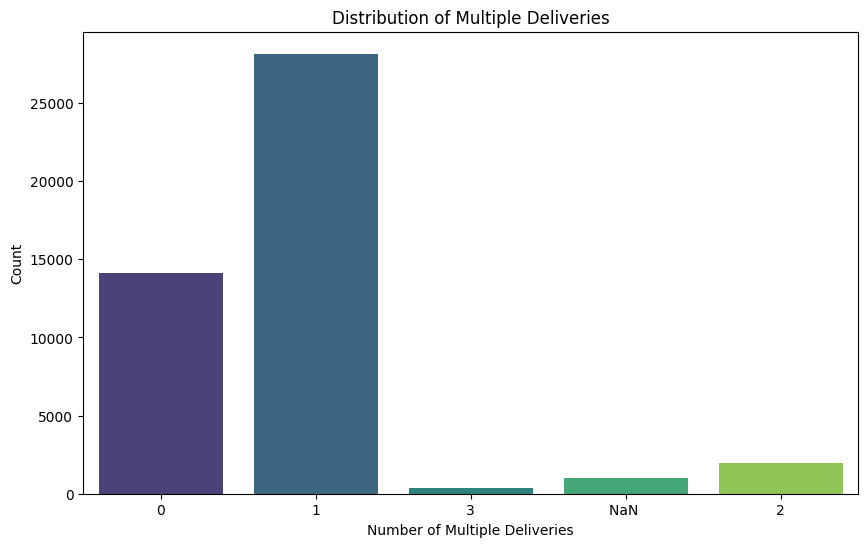

In [ ]:


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='multiple_deliveries', palette='viridis')
plt.title('Distribution of Multiple Deliveries')
plt.xlabel('Number of Multiple Deliveries')
plt.ylabel('Count')
plt.show()


**2. Scatter Plot of Vehicle Condition vs. Delivery Person's Ratings** **bold text**

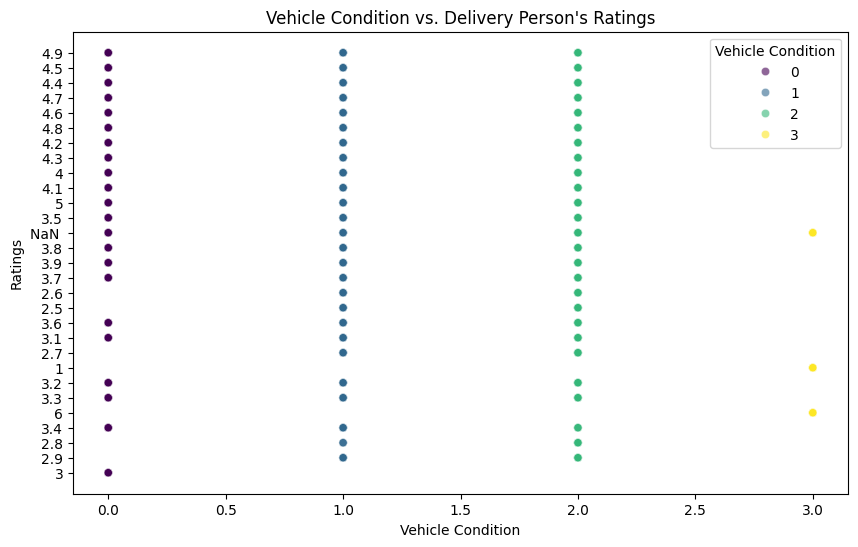

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Vehicle_condition', y='Delivery_person_Ratings', hue='Vehicle_condition', palette='viridis', alpha=0.6)
plt.title('Vehicle Condition vs. Delivery Person\'s Ratings')
plt.xlabel('Vehicle Condition')
plt.ylabel('Ratings')
plt.legend(title='Vehicle Condition', loc='best')
plt.show()


***3.Line Plot of Orders Over Time***

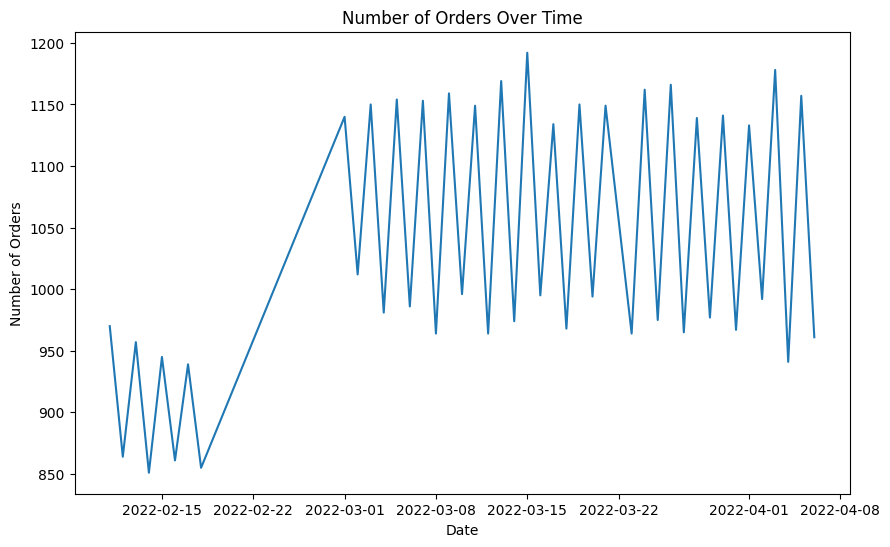

In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

plt.figure(figsize=(10, 6))
df.groupby(df['Order_Date'].dt.date).size().plot(kind='line')
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()


**4. Box Plot of Time Taken by Different Vehicle Types**

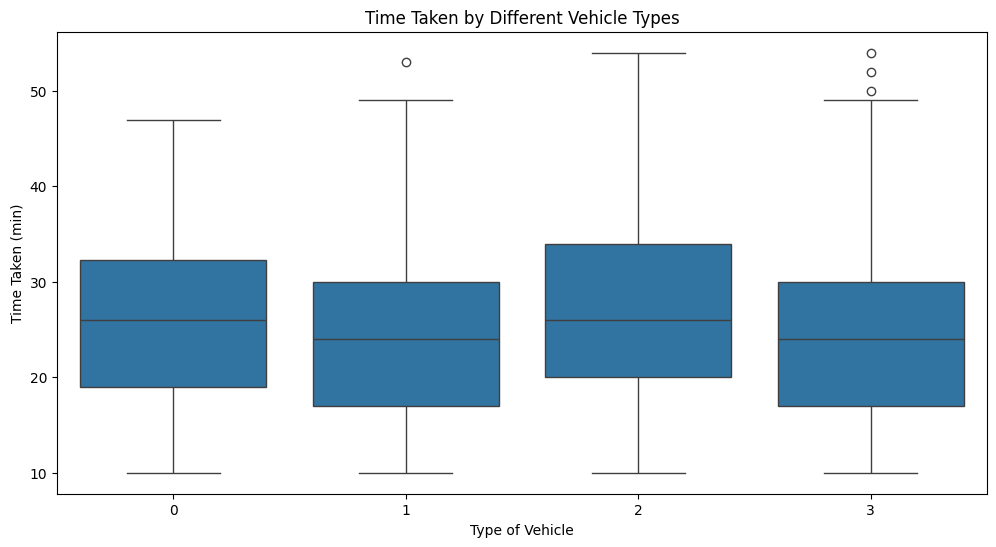

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type_of_vehicle', y='Time_taken(min)')
plt.title('Time Taken by Different Vehicle Types')
plt.xlabel('Type of Vehicle')
plt.ylabel('Time Taken (min)')
plt.show()


**5. Bar Plot of Road Traffic Density**

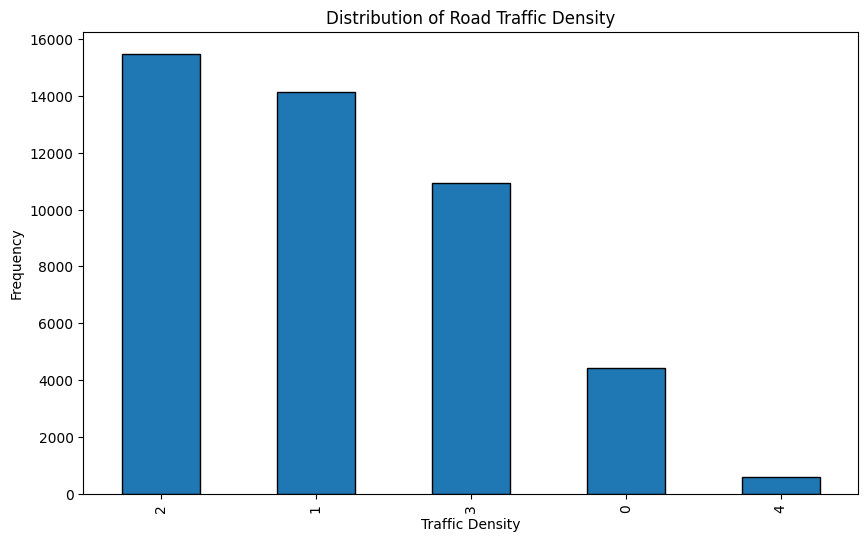

In [ ]:
plt.figure(figsize=(10, 6))
df['Road_traffic_density'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Road Traffic Density')
plt.xlabel('Traffic Density')
plt.ylabel('Frequency')
plt.show()


**6. Pie Chart of Weather Conditions**

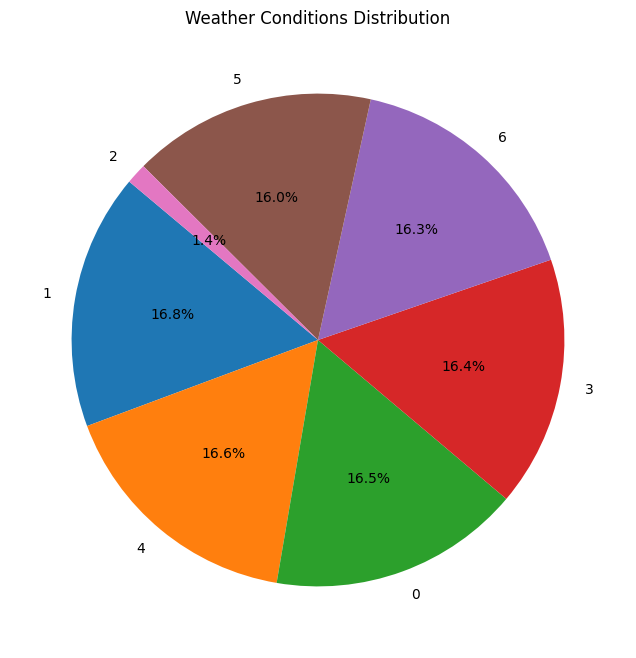

In [ ]:
plt.figure(figsize=(8, 8))
df['Weatherconditions'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Weather Conditions Distribution')
plt.ylabel('')
plt.show()


**7. Scatter Plot of Distance vs. Time Taken**

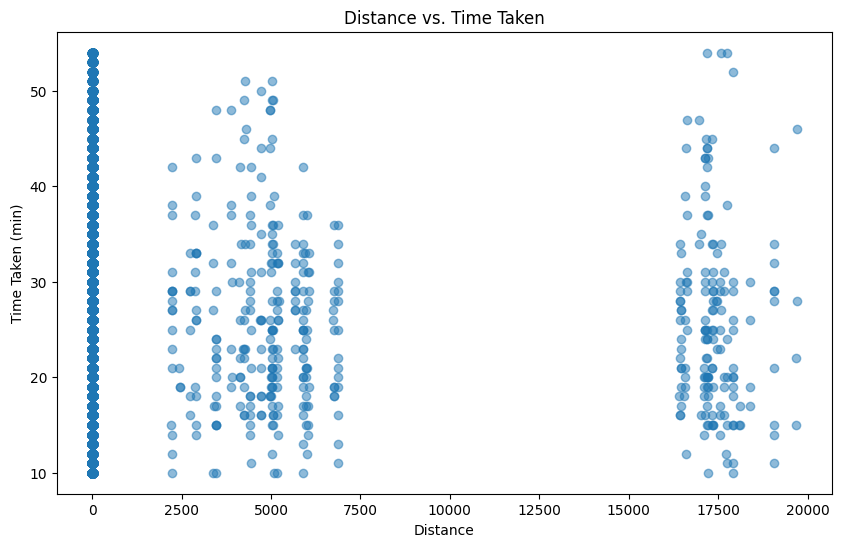

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['Time_taken(min)'], alpha=0.5)
plt.title('Distance vs. Time Taken')
plt.xlabel('Distance')
plt.ylabel('Time Taken (min)')
plt.show()



**8. Count Plot of Type of Order**

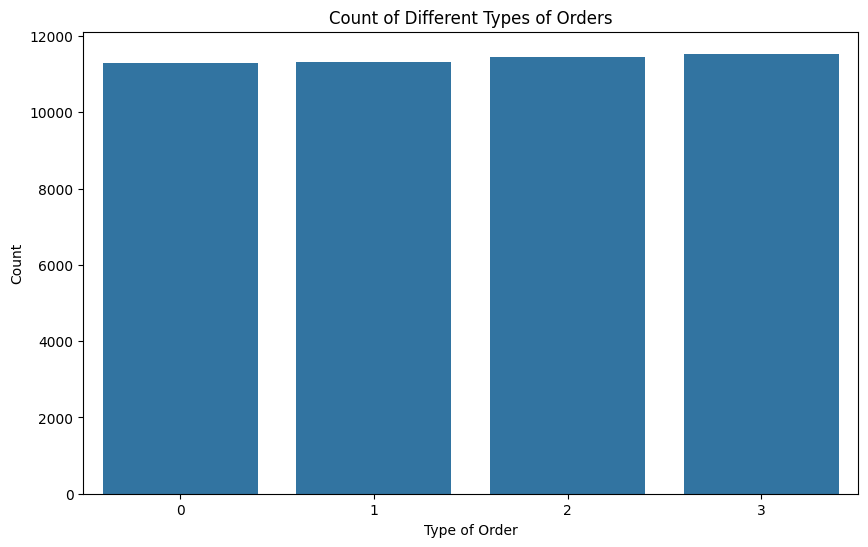

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type_of_order')
plt.title('Count of Different Types of Orders')
plt.xlabel('Type of Order')
plt.ylabel('Count')
plt.show()


**9. Heatmap of Correlation Matrix**

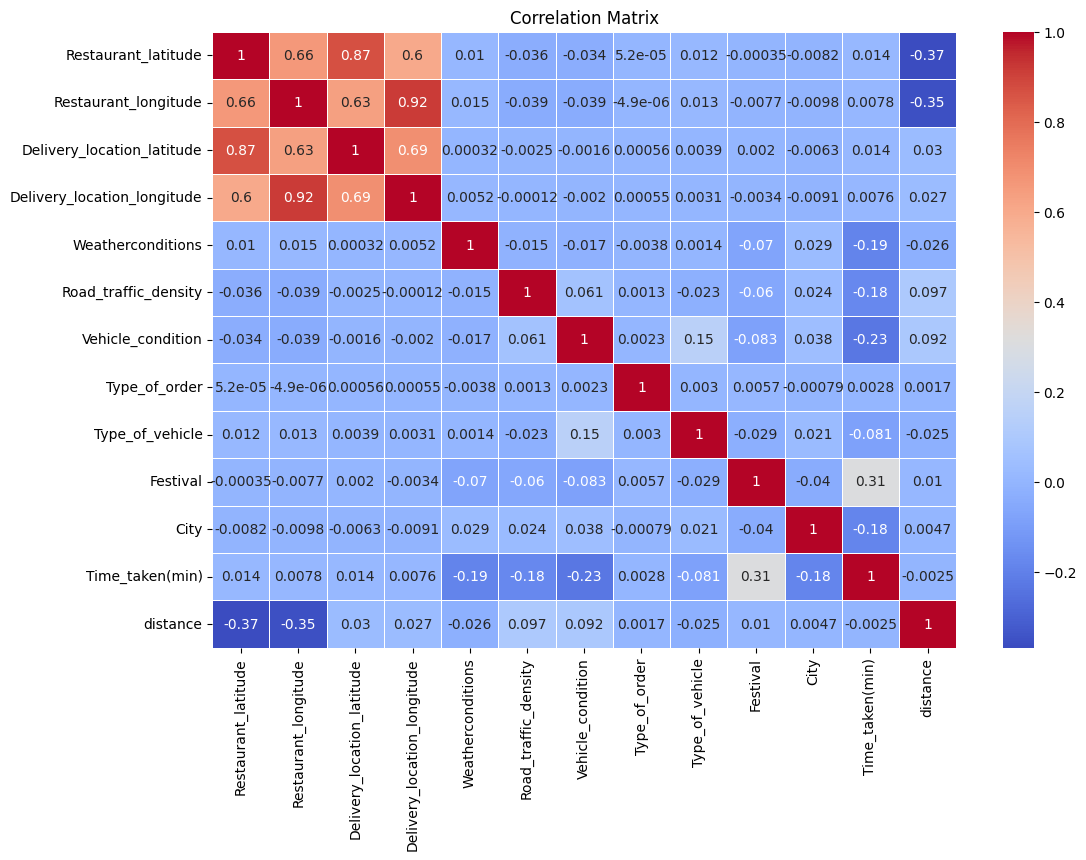

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the correlation matrix
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**10. Box Plot of Delivery Time During Festivals**

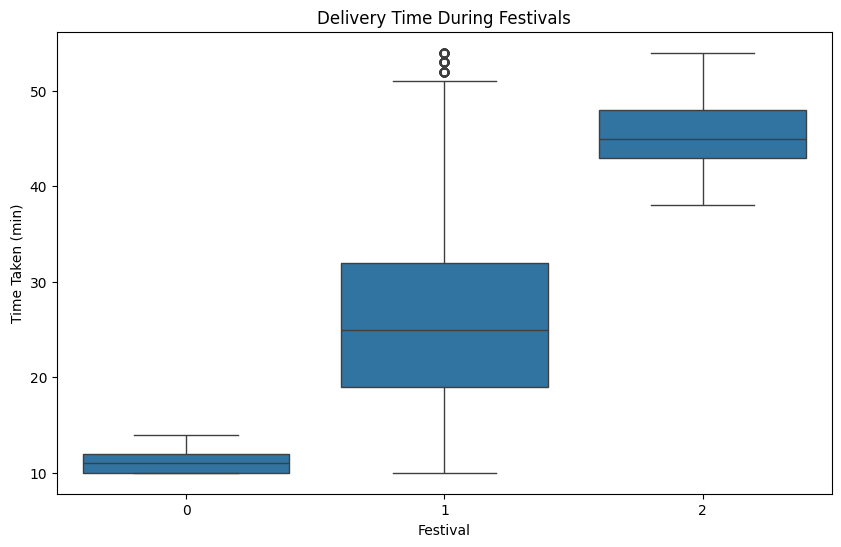

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Festival', y='Time_taken(min)')
plt.title('Delivery Time During Festivals')
plt.xlabel('Festival')
plt.ylabel('Time Taken (min)')
plt.show()


# Feature Selection and Feature Scaling





Based on the analysis and visualizations and also the information that we have about our data we select some of our features for our model , the most relevant ones of course.So the training gets easier for our model.


In [ ]:
x=np.array(df[['City','Delivery_person_Ratings','Delivery_person_Age','Road_traffic_density',
'Type_of_order','Type_of_vehicle','Vehicle_condition','Weatherconditions','distance']] )

y=np.array(df['Time_taken(min)'])

# df['Delivery_person_Age'] df['Delivery_person_Ratings']

In [ ]:
pd.DataFrame(x).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
pd.DataFrame(x_train).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [ ]:
x_train=x_train.astype(np.int64)
x_test=x_test.astype(np.int64)
y_train=y_train.astype(np.int64)
y_test=y_test.astype(np.int64)

<ipython-input-149-6d4f90b29b0a>:2: RuntimeWarning: invalid value encountered in cast
  x_test=x_test.astype(np.int64)


In [ ]:
pd.DataFrame(x_train).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test )

In [ ]:
# Print some statistics of x_train_scaled after scaling
print("Statistics of x_train_scaled after scaling:")
print(pd.DataFrame(x_train_scaled).isnull().sum())

Statistics of x_train_scaled after scaling:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


# Model Creation and Training

In [ ]:
# Model Creation and Training
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(1, x_train_scaled.shape[1])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))


In [ ]:
# Compile the model with Mean Squared Error loss and Adam optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')



In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 128)            70656     
                                                                 
 lstm_13 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 25)                1625      
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 121715 (475.45 KB)
Trainable params: 121715 (475.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Reshape data for LSTM (samples, timesteps, features)
x_train_reshaped = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test_reshaped = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
# Print shape of reshaped data
print("Shape of x_train_reshaped:", x_train_reshaped.shape)
print("Shape of x_test_reshaped:", x_test_reshaped.shape)

Shape of x_train_reshaped: (36474, 1, 9)
Shape of x_test_reshaped: (9119, 1, 9)


In [ ]:
# Define early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(x_train_reshaped, y_train, epochs=80, batch_size=64, validation_data=(x_test_reshaped, y_test), callbacks=[early_stop])


Epoch 1/80
570/570 [==============================] - 8s 8ms/step - loss: 8.5616 - val_loss: 6.0326
Epoch 2/80
570/570 [==============================] - 4s 7ms/step - loss: 5.7142 - val_loss: 5.7121
Epoch 3/80
570/570 [==============================] - 5s 9ms/step - loss: 5.5339 - val_loss: 5.4341
Epoch 4/80
570/570 [==============================] - 4s 7ms/step - loss: 5.3900 - val_loss: 5.3777
Epoch 5/80
570/570 [==============================] - 5s 8ms/step - loss: 5.2478 - val_loss: 5.1478
Epoch 6/80
570/570 [==============================] - 5s 8ms/step - loss: 5.0933 - val_loss: 4.9931
Epoch 7/80
570/570 [==============================] - 4s 7ms/step - loss: 4.9669 - val_loss: 4.9081
Epoch 8/80
570/570 [==============================] - 5s 9ms/step - loss: 4.8631 - val_loss: 4.7961
Epoch 9/80
570/570 [==============================] - 4s 8ms/step - loss: 4.8081 - val_loss: 4.8072
Epoch 10/80
570/570 [==============================] - 4s 7ms/step - loss: 4.7264 - val_loss: 4.8879

# Model Evaluation

In [ ]:
# Evaluate the model
loss = model.evaluate(x_test_reshaped, y_test)
print(f'Validation Loss: {loss}')

285/285 [==============================] - 1s 2ms/step - loss: 4.3165
Validation Loss: 4.316533088684082
